# Optimización de hiperparámetros

En esta clase vamos a trabajar con un dataset que contiene características y precios de autos.

Primero que nada, importamos las librerías más comunes que siempre utilizamos:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

La siguiente celda descarga el csv a su entorno de colab para luego importarlo con padas. Si quieren guardarse el csv, les dejo el link:

Link de descarga csv: https://drive.google.com/file/d/1gjwldBldRwzy26E8HCCBPXPVSBZOkynz/view?usp=sharing

In [ ]:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gjwldBldRwzy26E8HCCBPXPVSBZOkynz' -O car_prices.csv

--2021-10-03 19:52:09--  https://docs.google.com/uc?export=download&id=1gjwldBldRwzy26E8HCCBPXPVSBZOkynz
Resolving docs.google.com (docs.google.com)... 108.177.125.113, 108.177.125.100, 108.177.125.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2j98okkec5nfg064oug8igd2jr18p52n/1633290675000/14260194928165318342/*/1gjwldBldRwzy26E8HCCBPXPVSBZOkynz?e=download [following]
--2021-10-03 19:52:09--  https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2j98okkec5nfg064oug8igd2jr18p52n/1633290675000/14260194928165318342/*/1gjwldBldRwzy26E8HCCBPXPVSBZOkynz?e=download
Resolving doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-08-74-docs.googleusercontent.com (doc-08-7

In [ ]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1gjwldBldRwzy26E8HCCBPXPVSBZOkynz')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# EDA

¿Cuántas filas tiene el dataset?

In [ ]:
df.shape[0]

4345

### Nulos

¿Hay nulos?

In [ ]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Eliminar las filas que tienen nulos

In [ ]:
df = df.dropna(subset=['Price', 'EngineV'],axis=0)

Validar que no hayan quedado nulos

In [ ]:
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### Registration

¿Cuántos valores distintos toma "Registration"?

In [ ]:
df.Registration.unique()

array(['yes', 'no'], dtype=object)

¿Con que frecuencia aparece cada uno?

In [ ]:
df.Registration.value_counts()

yes    3654
no      371
Name: Registration, dtype: int64

Graficar

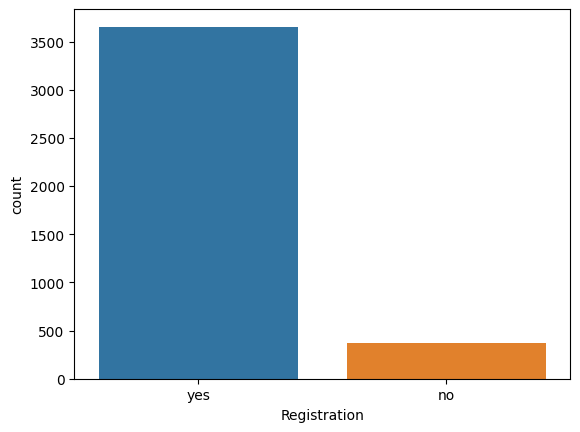

In [ ]:
sns.countplot(x='Registration', data=df);

¿Y en porcentajes?

In [ ]:
df.Registration.value_counts(normalize=True)

yes    0.907826
no     0.092174
Name: Registration, dtype: float64

### Price

Price es nuestro target. ¿Còmo se distibuye?

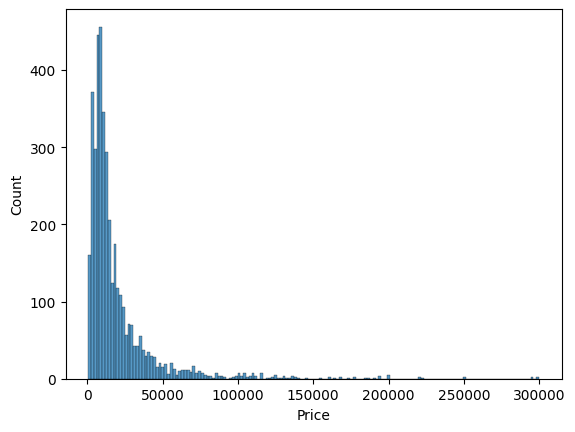

In [ ]:
sns.histplot(x = 'Price', data=df)
plt.show()

¿Tiene outliers? Graficar

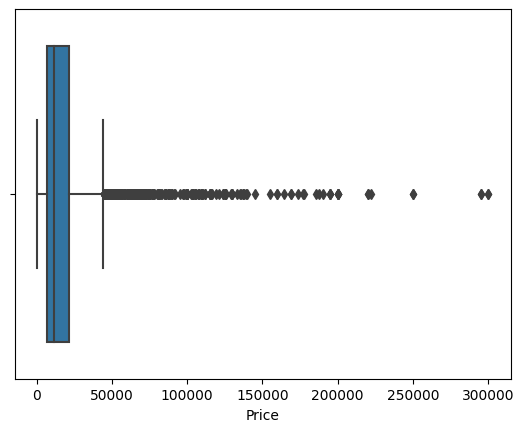

In [ ]:
sns.boxplot(x=df.Price)
plt.show()

### Mileage

¿Cómo se distribuye?

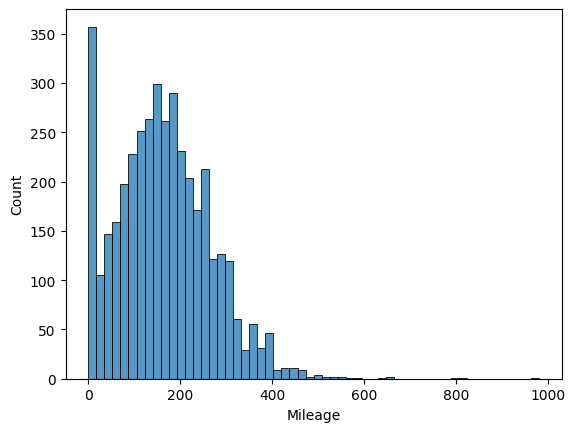

In [ ]:
sns.histplot(x=df.Mileage)
plt.show()

¿Hay outliers? Graficar

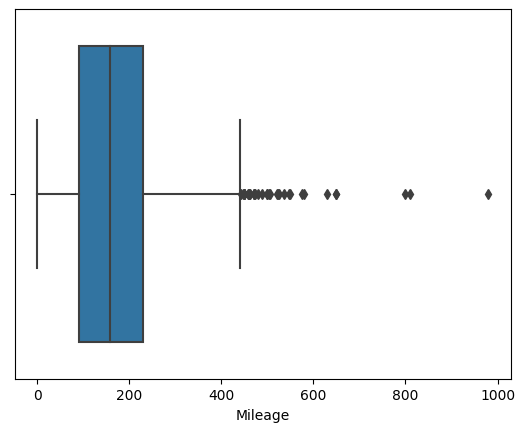

In [ ]:
sns.boxplot(x=df.Mileage);
plt.show();

### Body

¿Cuántos valores distintos puede tomar esta feature?

In [ ]:
df.Body.nunique()

6

¿Qué valores puede tomar?

In [ ]:
df.Body.unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

¿Con que frecuencia toma cada valor?


In [ ]:
df.Body.value_counts()

sedan        1534
crossover     824
van           626
other         394
vagon         379
hatch         268
Name: Body, dtype: int64

### Year

¿En que rango de años tenemos datos?

In [ ]:
df.Year.min()

1969

In [ ]:
df.Year.max()

2016

¿Hay alguna relación entre el año y el precio?

Graficar scatterplot

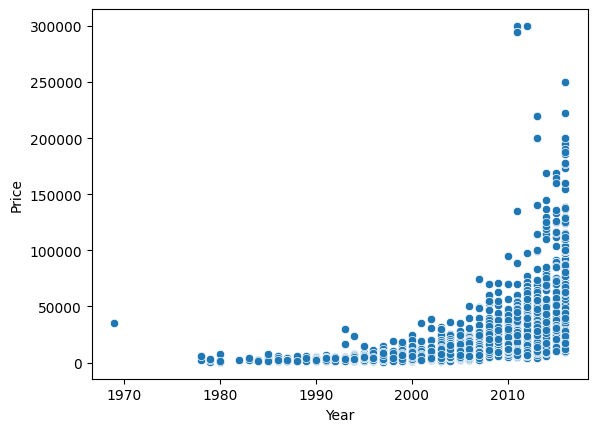

In [ ]:
sns.scatterplot(data=df, x='Year', y="Price")
plt.show()

Graficar lineplot

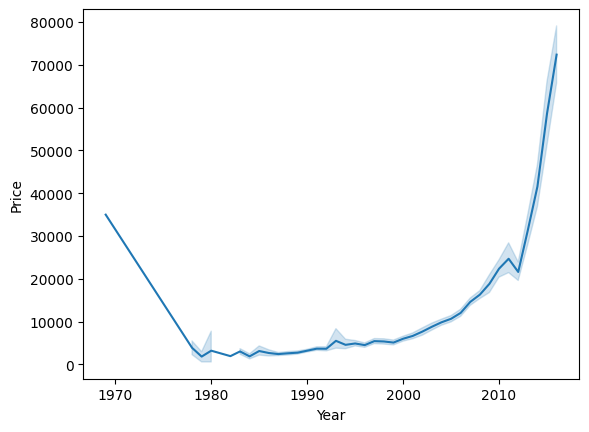

In [ ]:
sns.lineplot(data=df, x='Year', y="Price")
plt.show()

In [ ]:
df[df.Year == df.Year.min()]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
810,Mercedes-Benz,34999.0,sedan,150,2.8,Petrol,yes,1969,S 280


¿Qué paso en el año 1970?

Imprimir las filas donde el año es menor a 1980

In [ ]:
df[df.Year < 1980]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
288,Toyota,600.0,sedan,10,1.5,Petrol,yes,1979,Corolla
810,Mercedes-Benz,34999.0,sedan,150,2.8,Petrol,yes,1969,S 280
1025,Mercedes-Benz,2300.0,sedan,261,2.3,Gas,yes,1978,E-Class
1896,Mercedes-Benz,1950.0,sedan,1,2.0,Diesel,yes,1979,200
2122,Mercedes-Benz,2990.0,sedan,300,2.8,Gas,yes,1979,S 280
4319,Mercedes-Benz,5500.0,sedan,440,2.0,Petrol,yes,1978,E-Class


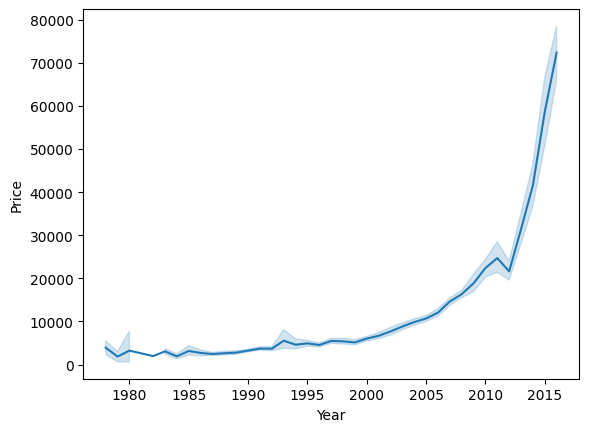

In [ ]:
df = df.loc[df['Year'] > 1969, :]
sns.lineplot(data=df, x='Year', y="Price")
plt.show()

¿Hay alguna relación importante entre Year y Mileage? Graficar

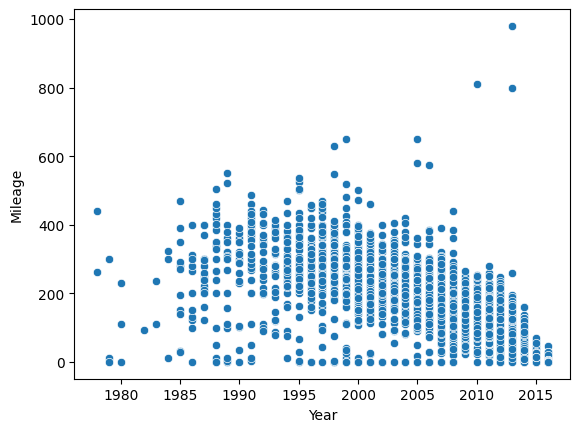

In [ ]:
sns.scatterplot(data=df, x='Year', y="Mileage")
plt.show()

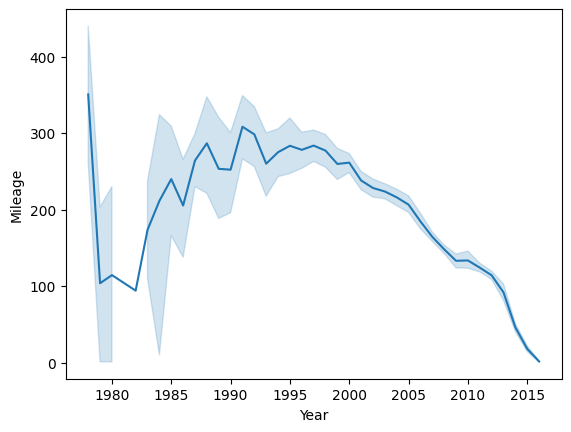

In [ ]:
sns.lineplot(data=df, x='Year', y="Mileage")
plt.show()

### Model

¿Cuántos modelos distintos hay?

In [ ]:
df.Model.nunique()

306

¿Cuál es el que aparece más veces?

In [ ]:
df.Model.value_counts()

E-Class    188
A6         156
Vito       156
Kangoo     136
Camry      127
          ... 
5            1
S5           1
21           1
Vista        1
Scion        1
Name: Model, Length: 306, dtype: int64

In [ ]:
df.Model.mode()

0    E-Class
Name: Model, dtype: object

# Preprocesamiento

Vamos a descartar la variable Model por simplicidad

Descartar la columna model:

In [ ]:
df = df.drop('Model', axis=1)

Vamos a hacer el preprocesamiento utilizando pipelines.

Para esto, primero que nada definimos una clase que nos permitirá seleccionar algunas features de nuestro dataset.

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class SelectColumns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

Ahora, definiremos un pipeline que trata por un lado a variables categóricas y por el otro lado a variables numéricas.

Al final de todo, entrena un modelo decision tree regressor:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

Separar el dataset en X e y:

In [ ]:
X = df.drop("Price", axis=1)
y = df["Price"].copy()

Para esto, primero que nada necesitamos definir 2 listas:
- una que contenga el nombre de las features categóricas
- Otra que contenga el nombre de las features numéricas

Definir las listas cat_cols y num_cols:

In [ ]:
num_cols = X.select_dtypes(include = ['number']).columns
cat_cols = X.select_dtypes(include = ['object']).columns
print(num_cols)
print(cat_cols)

Index(['Mileage', 'EngineV', 'Year'], dtype='object')
Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object')


In [ ]:
pipe = Pipeline([
    ("features", FeatureUnion([
        ('numerical', make_pipeline(SelectColumns(names=num_cols), StandardScaler())),
        ('categorical', make_pipeline(SelectColumns(names=cat_cols), OneHotEncoder(sparse=False)))
    ])),
    ('model', DecisionTreeRegressor(random_state=0))
])

Separar los datos con un train test split. Para obtener todos los mismos resultados, usemos un random_state = 0 y un test_size=0.15

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

Ahora, entrenar el modelo y medir su performance sobre el set de evaluación. Recuerden que el pipeline que definimos anteriormente, ya hace el preprocesamiento necesario sobre los datos.

In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numerical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['Mileage', 'EngineV', 'Year'], dtype='object'))),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object'))),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(sparse=False,
                                                                                sparse_output=False))]))])),
                ('model', DecisionTreeRegressor(random_state=0))])

In [ ]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

Medimos el MAE (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [ ]:
from sklearn.metrics import mean_absolute_error

print(f"Score en train: {mean_absolute_error(y_train, train_preds)}")
print(f"Score en test: {mean_absolute_error(y_test, test_preds)}")

Score en train: 214.46488916736283
Score en test: 5143.220116682434


Utilizando el método .score de el DecisionTreeRegressor (que por defecto calcula el R cuadrado) medir el R cuadrado en train y test:

In [ ]:
pipe.score(X_train, y_train)

0.9936627459704392

In [ ]:
pipe.score(X_test,y_test)

0.5296351776357762

Qué conclusiones sacan de estos resultados?

Para mejorar el modelo, vamos a hacer una búsqueda exhaustiva de hiperparámetros utilizando grid search.

Importar GridSearchCV de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

Si vemos en la documentación, primero que nada debemos generar un listado de parámetros.

Vamos a definir nuesto listado de la siguiente manera:
- max_depth: 2,3,4,5,6
- min_samples_split: 2, 3, 4, 5, 6
- min_samples_leaf: 1,2,3,4

Definir el diccionario de parámetros:

In [ ]:
parameters = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1,2,3,4]
}

Ahora,  como en la documentación de sklearn, definir un GridSearchCV y utilizarlo para nuestro pipeline con los parámetros que definimos anteriormente:

In [ ]:
#COMPLETAR
clf = GridSearchCV(pipe, parameters)
clf.fit(X_train, y_train)

ValueError: ignored

Esto nos da error al ejecutarlo. Si vemos el mensaje de error "Check the list of available parameters with `estimator.get_params().keys()`."

¿Qué se imaginan que está pasando?

Probemos lo que sugiere el mensaje de error, checkear el listado de parámetros disponibles utilizando el método "get_params().keys()" de nuestro pipeline.

Obtener el listado de parámetros disponibles de nuestro pipeline:

In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'model', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__numerical', 'features__categorical', 'features__numerical__memory', 'features__numerical__steps', 'features__numerical__verbose', 'features__numerical__selectcolumns', 'features__numerical__standardscaler', 'features__numerical__selectcolumns__names', 'features__numerical__standardscaler__copy', 'features__numerical__standardscaler__with_mean', 'features__numerical__standardscaler__with_std', 'features__categorical__memory', 'features__categorical__steps', 'features__categorical__verbose', 'features__categorical__selectcolumns', 'features__categorical__onehotencoder', 'features__categorical__selectcolumns__names', 'features__categorical__onehotencoder__categories', 'features__categorical__onehotencoder__drop', 'features__categorical__onehotencoder__dtype', 'features__categorical__onehotencoder__handle_unknown', 

Vemos que son muchos, pero si prestamos atención, vamos a ver que hay parámetros que comienzan con "features__" y "model__", justo los nombres con los que nosotros definimos a los elementos de nuestro pipeline.

Por lo tanto, al estar definidos dentro de un pipeline de sklearn, los nombres de los hiperparámetros de nuestro decision tree van a arrancar todos con "model__" (ya que es el nombre que definimos nosotros en nuestro pipeline).

Corregir el diccionario de parámetros:

In [ ]:
parameters = {
    'model__max_depth': [2,3,4,5,6],
    'model__min_samples_split': [2, 3, 4, 5, 6],
    'model__min_samples_leaf': [1,2,3,4]
}

Volver a aplicar grid search con la nueva corrección:

In [ ]:
gridsearch = GridSearchCV(pipe, parameters, n_jobs=-1)
gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numerical',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=Index(['Mileage', 'EngineV', 'Year'], dtype='object'))),
                                                                                        ('standardscaler',
                                                                                         StandardScaler())])),
                                                                       ('categorical',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object'))),
                                                                                        ('onehotencoder',
                                                                                         OneHotEncoder(sparse=False,
                                                                                                       sparse_output=False))]))])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 3, 4, 5, 6],
                         'model__min_samples_leaf': [1, 2, 3, 4],
                         'model__min_samples_split': [2, 3, 4, 5, 6]})

Una vez que hicimos fit sobre nuestro estimador con GridSearchCV, podemos acceder a el atributo .best_params_ que nos dice cuáles son los parámetros que mejores resultados dieron:

In [ ]:
gridsearch.best_params_

{'model__max_depth': 6,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 2}

Si ahora utilizamos nuestro GridSeachCV ya fitteado para hacer predicciones (.predict()), utilizará por defecto los mejores parámetros que encontró durante el entrenamiento.

Generar las predicciones para train, test y medir las mismas métricas que antes (R cuadrado y mean absolute error).

In [ ]:
train_preds = gridsearch.predict(X_train)
test_preds = gridsearch.predict(X_test)

In [ ]:
print(f"MAE en train: {mean_absolute_error(y_train, train_preds)}")
print(f"MAE en test: {mean_absolute_error(y_test, test_preds)}")

MAE en train: 4272.236517694081
MAE en test: 5052.10444390958


In [ ]:
print(f"R cuadrado en train: {gridsearch.score(X_train, y_train)}")
print(f"R cuadrado en test: {gridsearch.score(X_test, y_test)}")

R cuadrado en train: 0.8764729837978709
R cuadrado en test: 0.7939666061905855


## Grid Search con Cross Validation

In [ ]:
gridsearch = GridSearchCV(pipe, parameters, n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numerical',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=Index(['Mileage', 'EngineV', 'Year'], dtype='object'))),
                                                                                        ('standardscaler',
                                                                                         StandardScaler())])),
                                                                       ('categorical',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object'))),
                                                                                        ('onehotencoder',
                                                                                         OneHotEncoder(sparse=False,
                                                                                                       sparse_output=False))]))])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 3, 4, 5, 6],
                         'model__min_samples_leaf': [1, 2, 3, 4],
                         'model__min_samples_split': [2, 3, 4, 5, 6]})

In [ ]:
gridsearch.best_params_

{'model__max_depth': 6,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 2}